In [1]:
import datetime

import pandas as pd
from matplotlib import pyplot as plt

from periodic_patterns_v2 import TimeStampSetV2
from periodicity import get_topk_periods

In [2]:
df = pd.read_csv('proxy_login.log.csv')
df

,timestamp,connectivity,login_redirect,duration,successfully_logged_in
0,2019-05-02 09:17:46.616877,1,1,0.249972,1
1,2019-05-02 09:18:46.867337,1,0,0.093758,1
2,2019-05-02 09:19:00.143748,1,0,0.114271,1
3,2019-05-02 09:20:00.269821,1,0,0.096899,1
4,2019-05-02 09:21:00.370104,1,0,0.089100,1
...,...,...,...,...,...
725027,2020-09-23 13:52:14.964572,0,0,0.002002,0
725028,2020-09-23 13:52:44.966857,0,0,0.000999,0
725029,2020-09-23 13:53:14.967926,0,0,0.005995,0
725030,2020-09-23 13:53:44.974638,0,0,0.005994,0


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
timestamps = df[(df['connectivity'] == 0) & (df['timestamp'] > pd.to_datetime('2020-06-01'))]['timestamp']
timestamps

510146   2020-06-01 04:01:02.489888
511320   2020-06-01 23:41:44.043024
511321   2020-06-01 23:43:14.063766
511322   2020-06-01 23:44:44.068720
511323   2020-06-01 23:46:14.078737
                    ...            
725027   2020-09-23 13:52:14.964572
725028   2020-09-23 13:52:44.966857
725029   2020-09-23 13:53:14.967926
725030   2020-09-23 13:53:44.974638
725031   2020-09-23 13:54:14.981006
Name: timestamp, Length: 1300, dtype: datetime64[ns]

# events

In [5]:
tss = TimeStampSetV2(timestamps)
len(tss)

1300

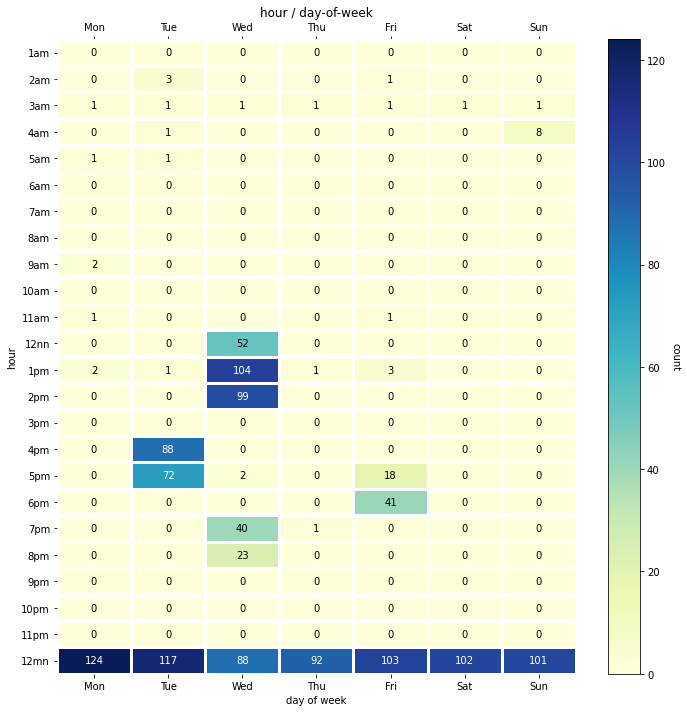

In [6]:
tss.hour_of_day.plot()

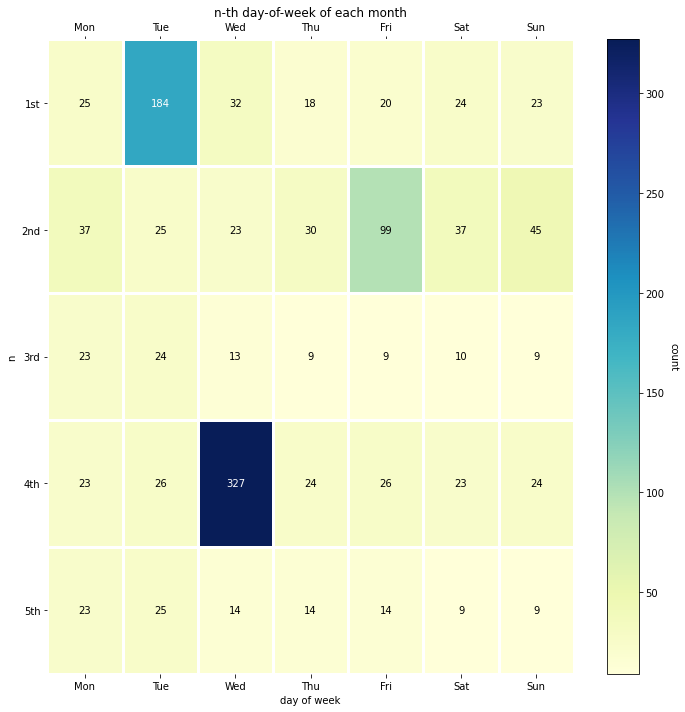

In [7]:
tss.nth_day_of_month.plot()

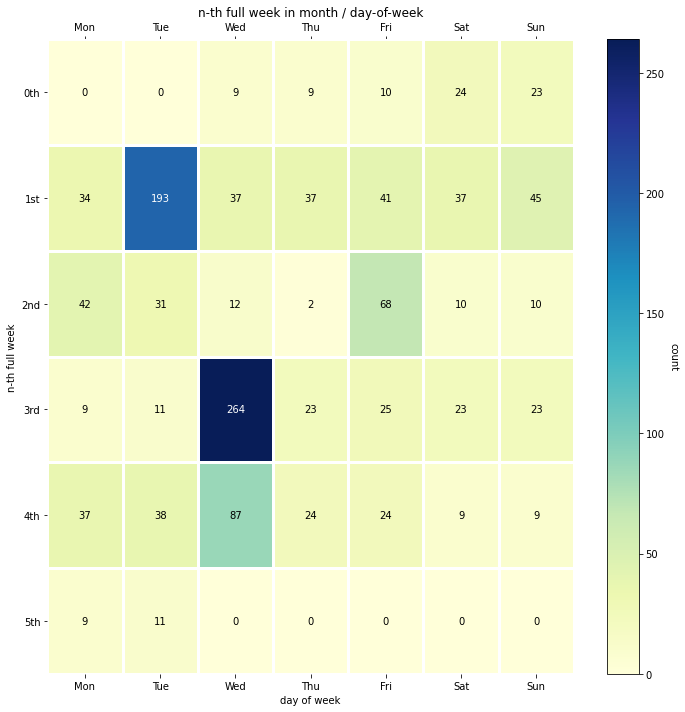

In [8]:
tss.full_week_of_month.plot()

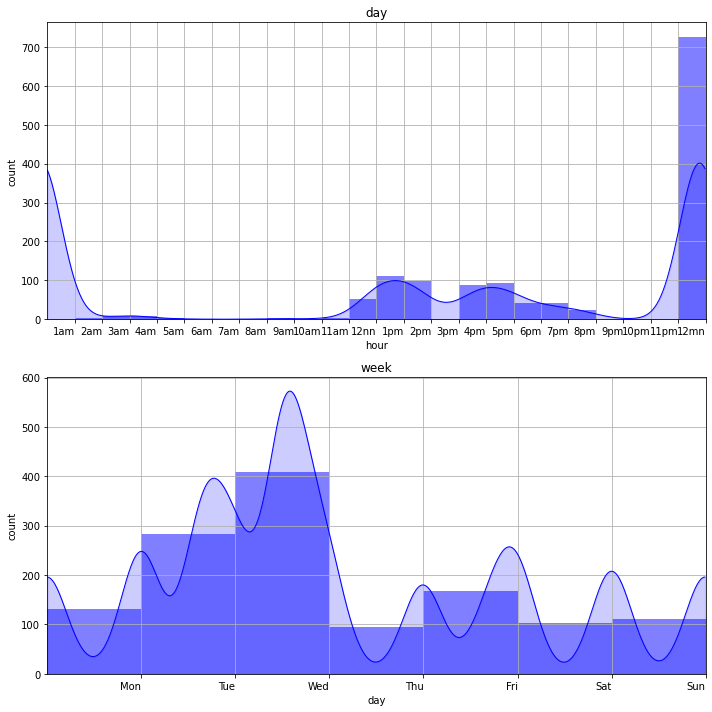

In [9]:
tss.plot(clear=False)

In [10]:
for i in range(1,61):
    print(i, len(tss.sessions(datetime.timedelta(minutes=i))))

1 881
2 97
3 97
4 97
5 97
6 97
7 97
8 97
9 97
10 95
11 95
12 95
13 95
14 95
15 95
16 95
17 95
18 95
19 95
20 94
21 94
22 94
23 94
24 94
25 94
26 94
27 94
28 94
29 94
30 94
31 94
32 94
33 94
34 93
35 93
36 93
37 93
38 93
39 93
40 93
41 93
42 93
43 93
44 93
45 93
46 93
47 93
48 92
49 92
50 92
51 92
52 92
53 92
54 92
55 92
56 92
57 92
58 92
59 92
60 92


# sessions

In [11]:
tss2 = tss.session_set(datetime.timedelta(minutes=10))
len(tss2)

95

In [12]:
tss2.timestamps

[datetime.datetime(2020, 6, 1, 4, 1, 2, 489888, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 1, 23, 41, 44, 43024, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 2, 23, 41, 8, 499145, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 3, 23, 41, 24, 895289, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 4, 23, 41, 34, 160596, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 5, 10, 5, 44, 31497, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 5, 23, 41, 21, 688197, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 6, 23, 41, 51, 940566, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 7, 23, 41, 54, 939992, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 8, 8, 22, 21, 366348, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 8, 10, 0, 4, 712705, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 8, 12, 6, 5, 677643, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 

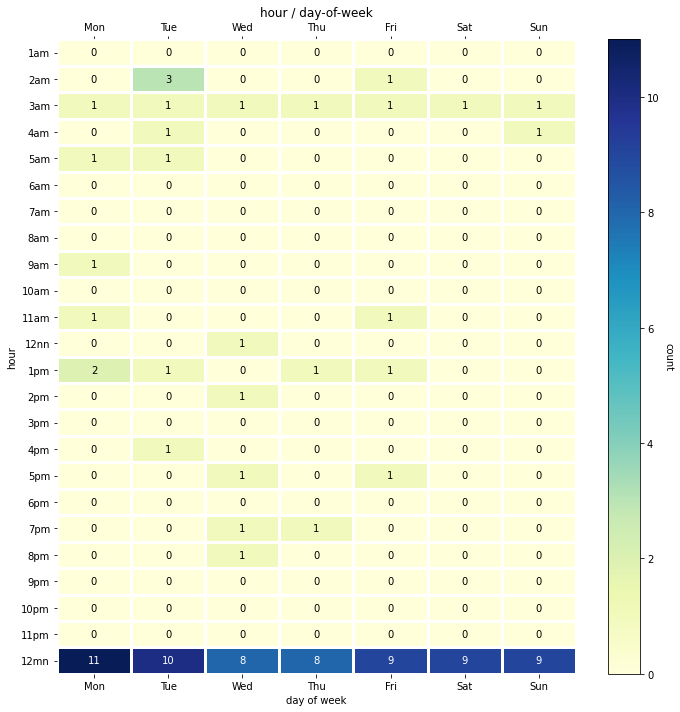

In [13]:
tss2.hour_of_day.plot()

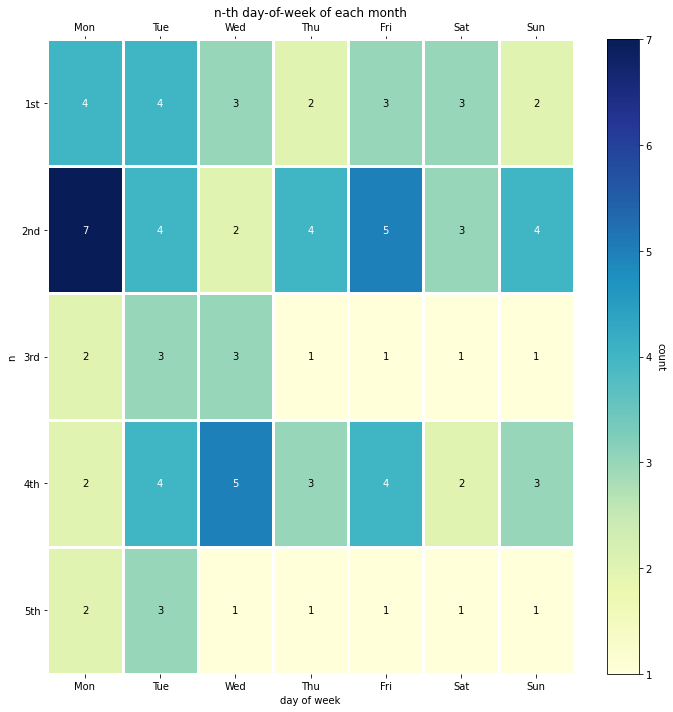

In [14]:
tss2.nth_day_of_month.plot()

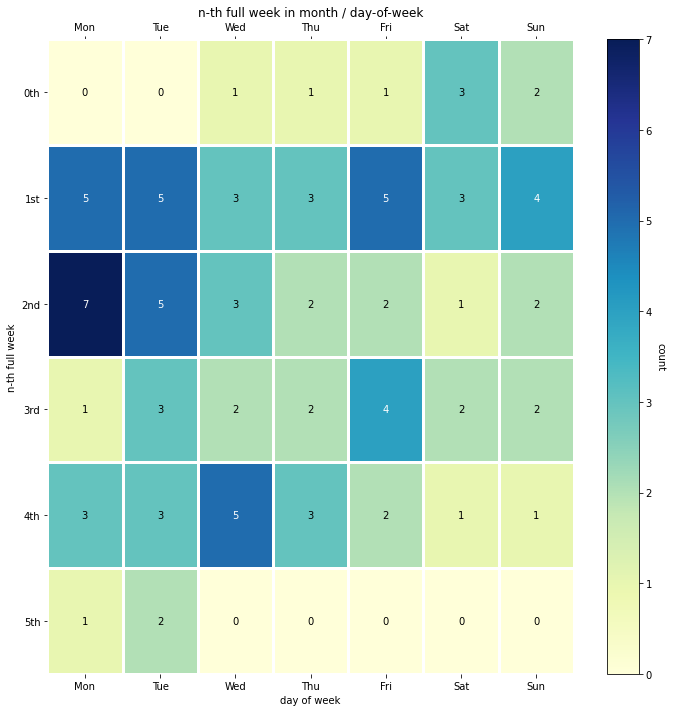

In [15]:
tss2.full_week_of_month.plot()

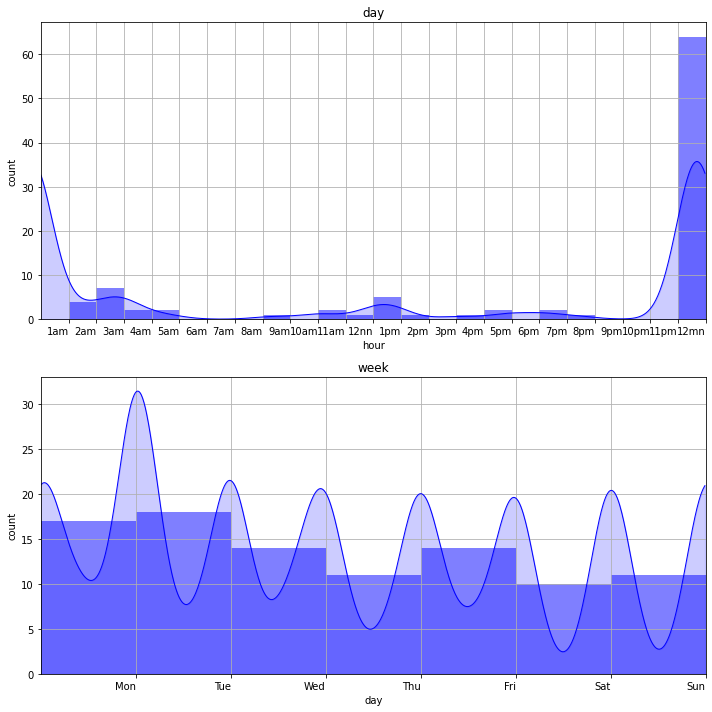

In [16]:
tss2.plot()

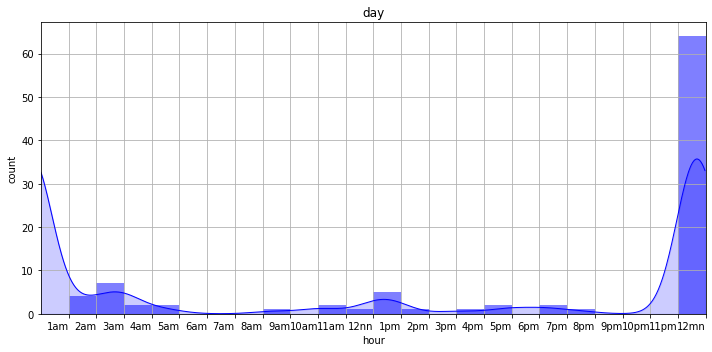

In [17]:
tss2.day.plot(figsize=(10,5))

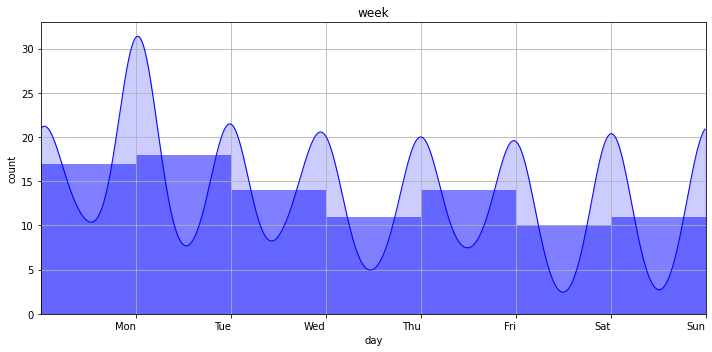

In [18]:
tss2.week.plot(figsize=(10,5))

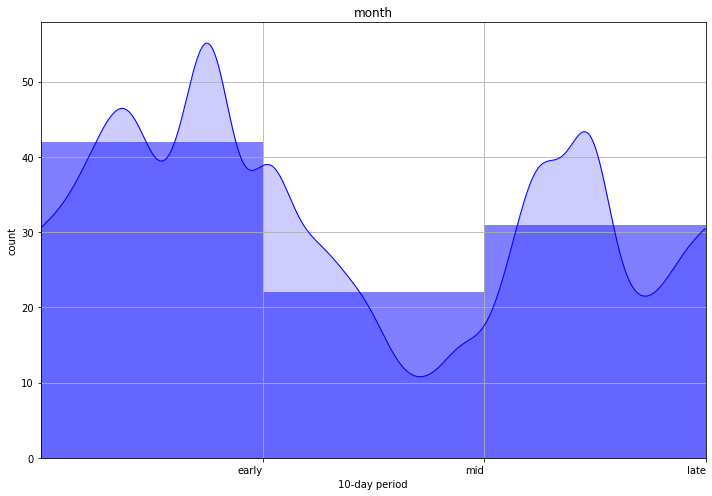

In [19]:
tss2.month.plot(figsize=(10,7))

2020-06-01 04:01:02.489888+00:00 0.10108487261967755
2020-06-05 10:05:44.031497+00:00 0.11662057585929328
2020-06-08 08:22:21.366348+00:00 0.057810904448751456
2020-06-08 08:23:51.382576+00:00 0.057810904448751456
2020-06-08 10:00:04.712705+00:00 0.06881459582978451
2020-06-08 12:06:05.677643+00:00 0.1959265806421081
2020-06-08 12:39:18.110069+00:00 0.2058828424956966
2020-06-09 01:08:19.101486+00:00 0.3108976598783016
2020-06-09 12:34:15.385350+00:00 0.37897494332274795
2020-06-11 02:47:58.925482+00:00 0.15698311842582602
2020-06-11 12:19:49.044956+00:00 0.19055444119387588
2020-06-12 16:42:32.155229+00:00 0.34445264318593755
2020-06-12 16:43:32.157825+00:00 0.34445264318593755
2020-06-12 16:44:32.160564+00:00 0.34445264318593755
2020-06-12 16:45:32.168224+00:00 0.34445264318593755
2020-06-12 16:46:32.170527+00:00 0.34015200569762116
2020-06-12 16:47:32.173298+00:00 0.34015200569762116
2020-06-12 16:48:32.175395+00:00 0.34015200569762116
2020-06-12 16:49:32.177478+00:00 0.340152005697

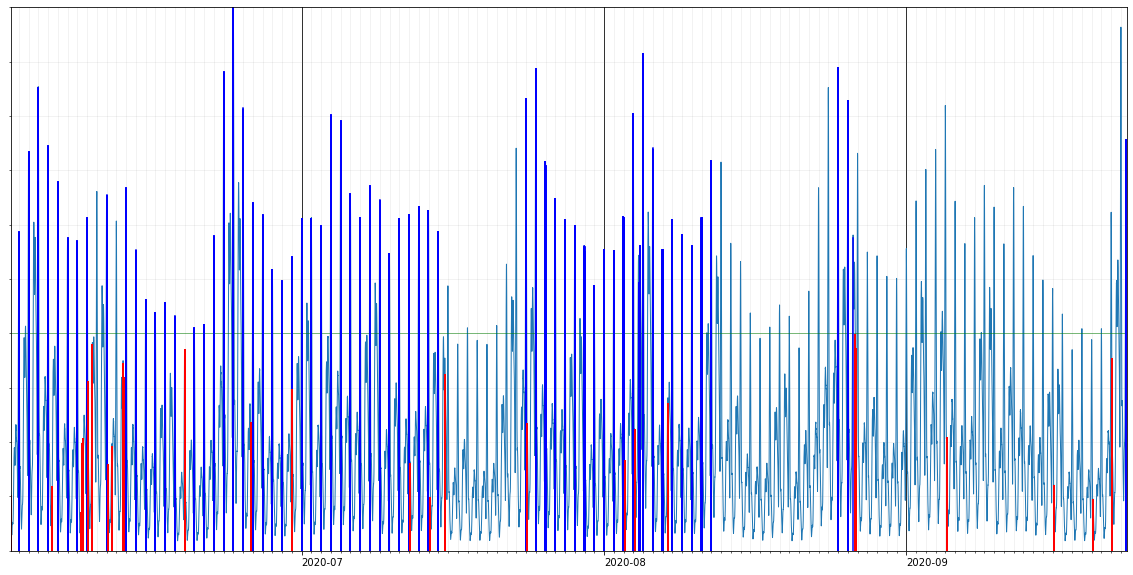

In [20]:
tss.plot_session_likelihoods(figsize=(20,10))

2020-06-01 04:01:02.489888+00:00 0.27257478611442415
2020-06-05 10:05:44.031497+00:00 0.19225656256836568
2020-06-08 08:22:21.366348+00:00 0.20215053467084906
2020-06-08 10:00:04.712705+00:00 0.23560238883044246
2020-06-08 12:06:05.677643+00:00 0.31082824041850654
2020-06-08 12:39:18.110069+00:00 0.30608548692190113
2020-06-09 12:34:15.385350+00:00 0.26152490234357995
2020-06-11 02:47:58.925482+00:00 0.3656185879001436
2020-06-11 12:19:49.044956+00:00 0.2219602148261872
2020-06-12 16:42:32.155229+00:00 0.19674189048539054
2020-06-25 18:07:18.178993+00:00 0.23287216692086565
2020-07-12 03:07:51.694722+00:00 0.35256476970583855
2020-07-14 04:35:44.517068+00:00 0.2370052835887311
2020-07-15 16:57:23.576988+00:00 0.19802522039249124
2020-07-24 01:59:08.219913+00:00 0.36931704935452736
2020-07-24 02:46:08.321201+00:00 0.37539216509143203
2020-08-03 02:48:35.791413+00:00 0.39709423197860355
2020-08-04 15:01:51.376104+00:00 0.16773492992307132
2020-08-07 12:16:23.082852+00:00 0.26278278213133

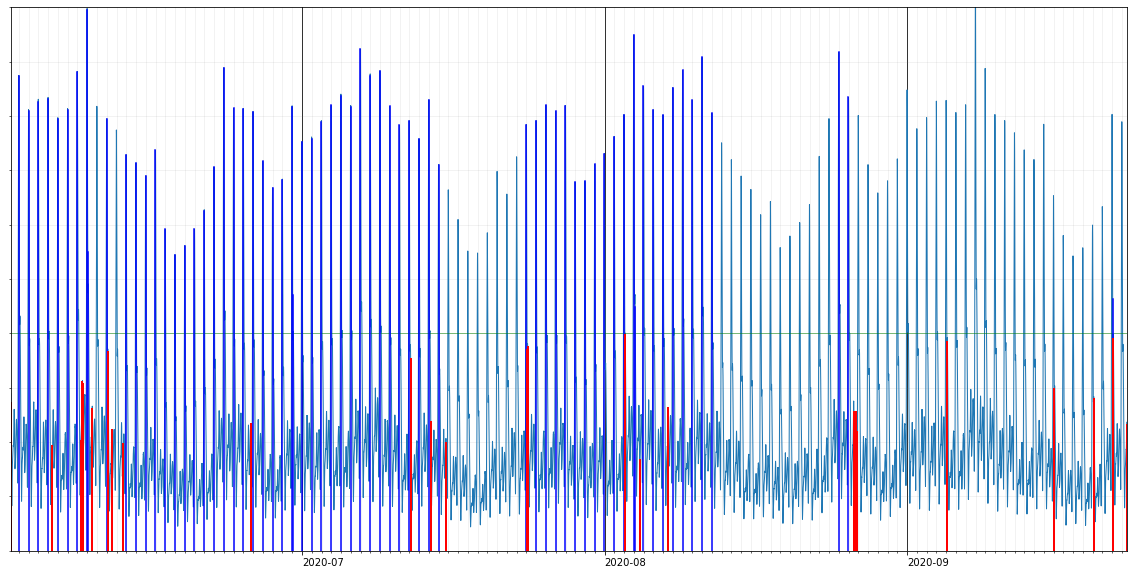

In [21]:
tss2.plot_session_likelihoods(figsize=(20,10))

2020-06-01 04:01:02.489888+00:00 0.27257478611442415
2020-06-05 10:05:44.031497+00:00 0.19225656256836568
2020-06-08 08:22:21.366348+00:00 0.20215053467084906
2020-06-08 10:00:04.712705+00:00 0.23560238883044246
2020-06-08 12:06:05.677643+00:00 0.31082824041850654
2020-06-08 12:39:18.110069+00:00 0.30608548692190113
2020-06-09 12:34:15.385350+00:00 0.26152490234357995
2020-06-11 02:47:58.925482+00:00 0.3656185879001436
2020-06-11 12:19:49.044956+00:00 0.2219602148261872
2020-06-12 16:42:32.155229+00:00 0.19674189048539054
2020-06-25 18:07:18.178993+00:00 0.23287216692086565
2020-07-12 03:07:51.694722+00:00 0.35256476970583855
2020-07-14 04:35:44.517068+00:00 0.2370052835887311
2020-07-15 16:57:23.576988+00:00 0.19802522039249124
2020-07-24 01:59:08.219913+00:00 0.36931704935452736
2020-07-24 02:46:08.321201+00:00 0.37539216509143203
2020-08-03 02:48:35.791413+00:00 0.39709423197860355
2020-08-04 15:01:51.376104+00:00 0.16773492992307132
2020-08-07 12:16:23.082852+00:00 0.26278278213133

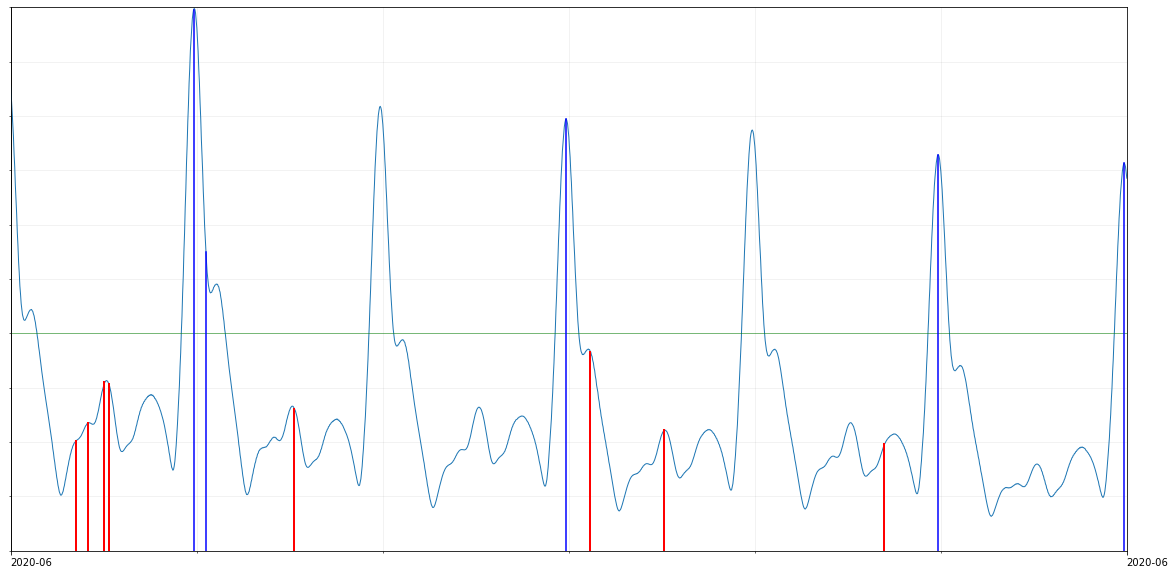

In [26]:
tss2.plot_session_likelihoods(figsize=(20,10), x_lim=(datetime.datetime(2020,6,8),datetime.datetime(2020,6,14)))

2020-06-01 04:01:02.489888+00:00 0.27257478611442415
2020-06-05 10:05:44.031497+00:00 0.19225656256836568
2020-06-08 08:22:21.366348+00:00 0.20215053467084906
2020-06-08 10:00:04.712705+00:00 0.23560238883044246
2020-06-08 12:06:05.677643+00:00 0.31082824041850654
2020-06-08 12:39:18.110069+00:00 0.30608548692190113
2020-06-09 12:34:15.385350+00:00 0.26152490234357995
2020-06-11 02:47:58.925482+00:00 0.3656185879001436
2020-06-11 12:19:49.044956+00:00 0.2219602148261872
2020-06-12 16:42:32.155229+00:00 0.19674189048539054
2020-06-25 18:07:18.178993+00:00 0.23287216692086565
2020-07-12 03:07:51.694722+00:00 0.35256476970583855
2020-07-14 04:35:44.517068+00:00 0.2370052835887311
2020-07-15 16:57:23.576988+00:00 0.19802522039249124
2020-07-24 01:59:08.219913+00:00 0.36931704935452736
2020-07-24 02:46:08.321201+00:00 0.37539216509143203
2020-08-03 02:48:35.791413+00:00 0.39709423197860355
2020-08-04 15:01:51.376104+00:00 0.16773492992307132
2020-08-07 12:16:23.082852+00:00 0.26278278213133

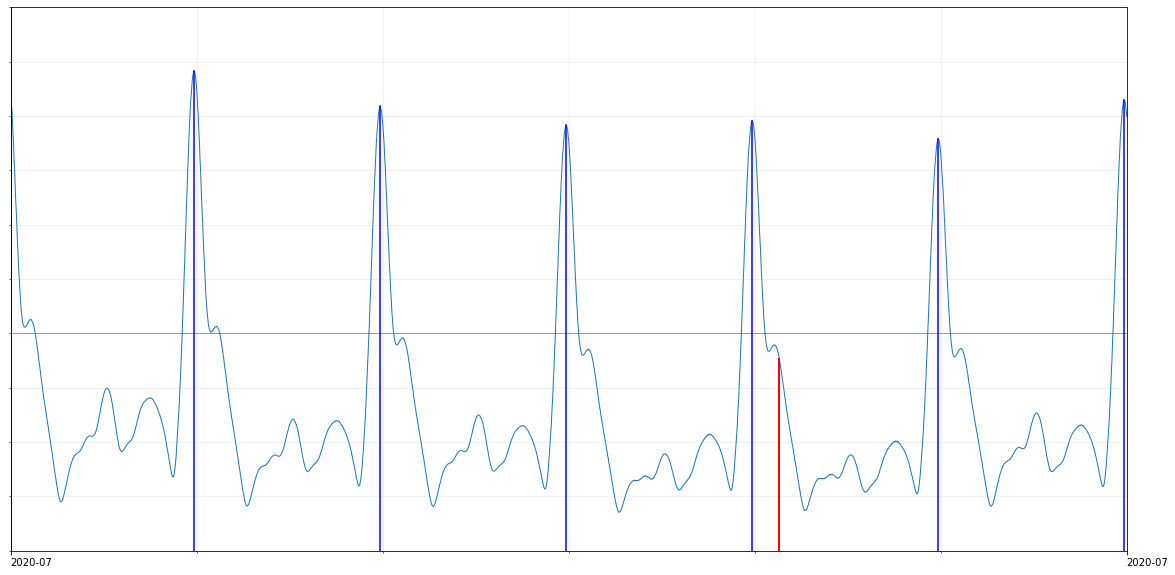

In [27]:
tss2.plot_session_likelihoods(figsize=(20,10), x_lim=(datetime.datetime(2020,7,8),datetime.datetime(2020,7,14)))

# periodicity

In [22]:
df = get_topk_periods(pd.Series(pd.to_datetime(tss2.timestamps)), k=1000)
df

flattening...
have 95 unique timestamps
not thresholding, only have 95 unique timestamps (less than 1000)
fft...
making dataframe...


,magnitude,period_seconds,period_days,period_timedelta,period_formatted,weight
1251,74.362548,1252.0,0.014491,00:20:52,20.87 minutes,4.308952
2214,73.167164,2215.0,0.025637,00:36:55,36.92 minutes,4.292747
2879,72.160015,2880.0,0.033333,00:48:00,48 minutes,4.278886
1107,70.590095,1108.0,0.012824,00:18:28,18.47 minutes,4.256890
737,70.201484,738.0,0.008542,00:12:18,12.30 minutes,4.251369
...,...,...,...,...,...,...
1184,13.909086,1185.0,0.013715,00:19:45,19.75 minutes,2.632542
589,13.897979,590.0,0.006829,00:09:50,9.83 minutes,2.631743
613,13.896133,614.0,0.007106,00:10:14,10.23 minutes,2.631611
1960,13.896042,1961.0,0.022697,00:32:41,32.68 minutes,2.631604


note: too many harmonics to be useful

In [23]:
df[(df['period_seconds'] > 3600) & (df['magnitude'] > 30)].sort_values('period_seconds', ascending=False).head(10)

,magnitude,period_seconds,period_days,period_timedelta,period_formatted,weight
6177,49.423130,86806.0,1.004699,1 days 00:06:46,1.00 days,3.900419
6176,52.778714,86052.0,0.995972,0 days 23:54:12,1.00 days,3.966108
6062,70.190707,43214.0,0.500162,0 days 12:00:14,12.00 hours,4.251216
5948,46.236287,28851.0,0.333924,0 days 08:00:51,8.01 hours,3.833765
5947,46.372397,28767.0,0.332951,0 days 07:59:27,7.99 hours,3.836704
5833,61.909804,21607.0,0.250081,0 days 06:00:07,6.00 hours,4.125679
5832,36.217261,21560.0,0.249537,0 days 05:59:20,5.99 hours,3.589536
5719,42.407625,17301.0,0.200243,0 days 04:48:21,4.81 hours,3.747328
5718,56.749171,17270.0,0.199884,0 days 04:47:50,4.80 hours,4.038641
5604,57.211913,14405.0,0.166725,0 days 04:00:05,4.00 hours,4.046762
